# Red Wine Quality Prediction

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


loading the data

In [5]:
# loading the dataset to a pandas dataframe
wine_dataset=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
#  checkinh first 5 rows of the datset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# checking for the missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [15]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


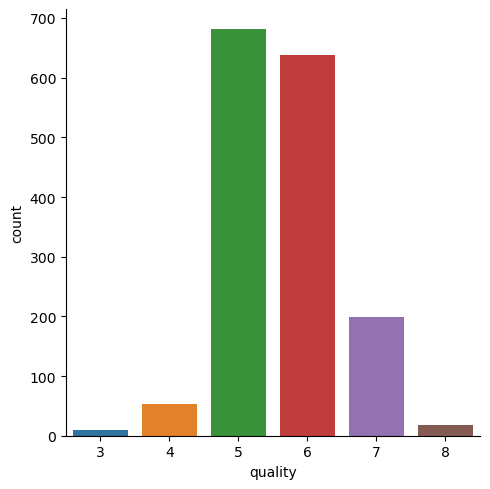

In [16]:
# number of values for each quality 
sns.catplot(x='quality',data=wine_dataset,kind='count')

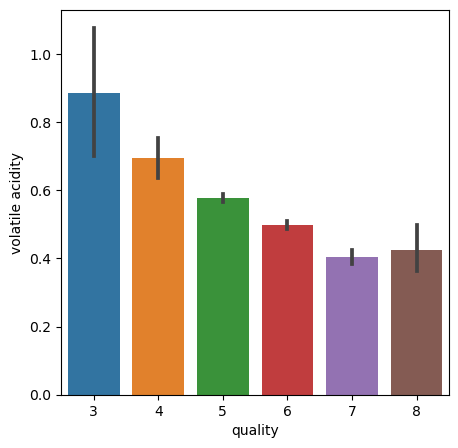

In [34]:
# comparing two columns (volatile acidity, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'volatile acidity', data = wine_dataset)
plt.show()


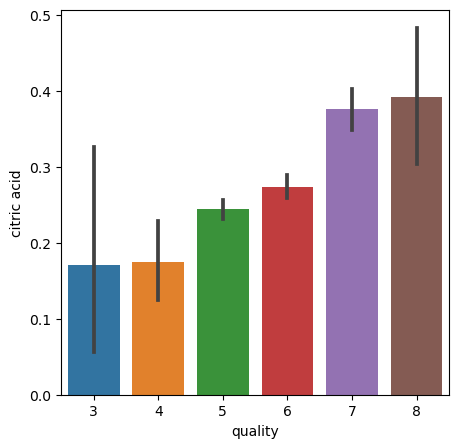

In [35]:
# comparing two columns (citric acid, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'citric acid', data = wine_dataset)
plt.show()


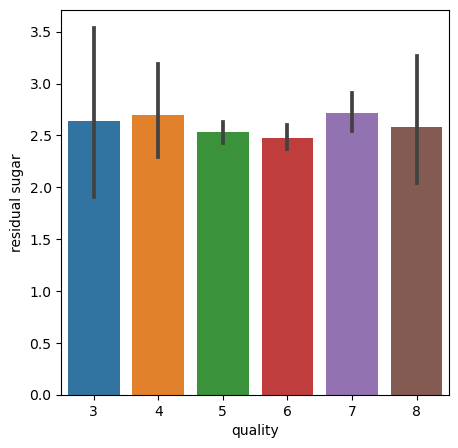

In [36]:
# comparing two columns (residual sugar, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'residual sugar', data = wine_dataset)
plt.show()


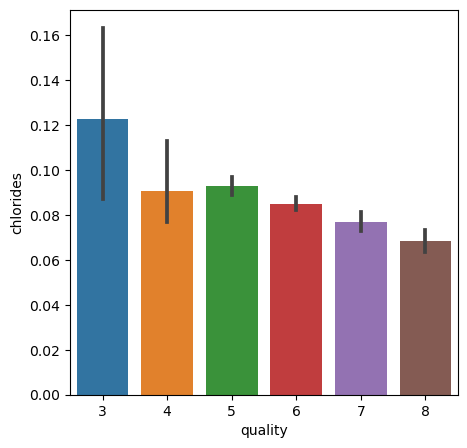

In [37]:
# comparing two columns (chlorides, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'chlorides', data = wine_dataset)
plt.show()


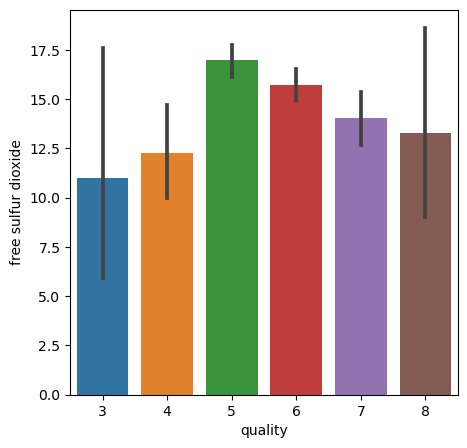

In [38]:
# comparing two columns (free sulfur dioxide, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'free sulfur dioxide', data = wine_dataset)
plt.show()


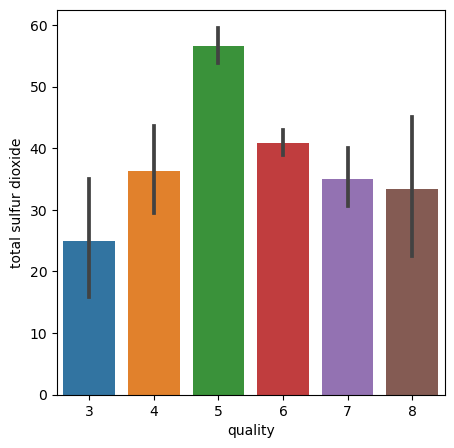

In [39]:
# comparing two columns (ctotal sulfur dioxide, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'total sulfur dioxide', data = wine_dataset)
plt.show()


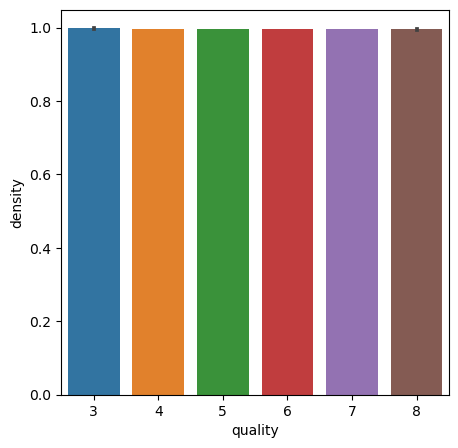

In [40]:
# comparing two columns (density, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'density', data = wine_dataset)
plt.show()


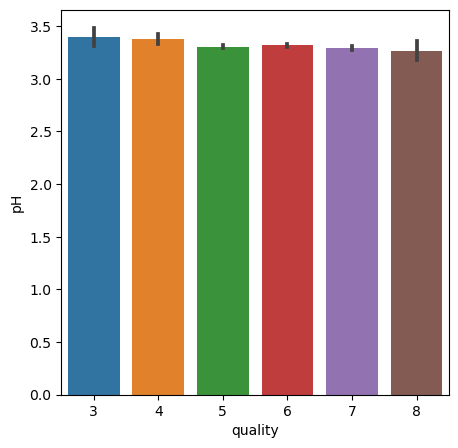

In [41]:
# comparing two columns (pH, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'pH', data = wine_dataset)
plt.show()


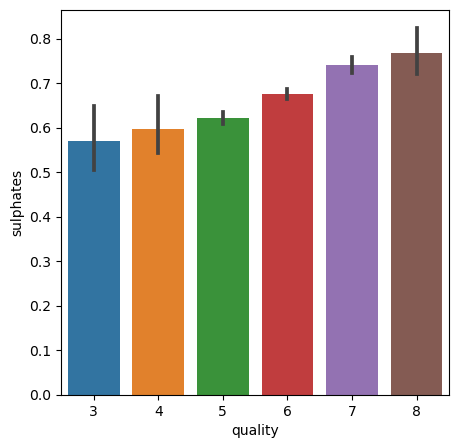

In [42]:
# comparing two columns (sulphates, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'sulphates', data = wine_dataset)
plt.show()


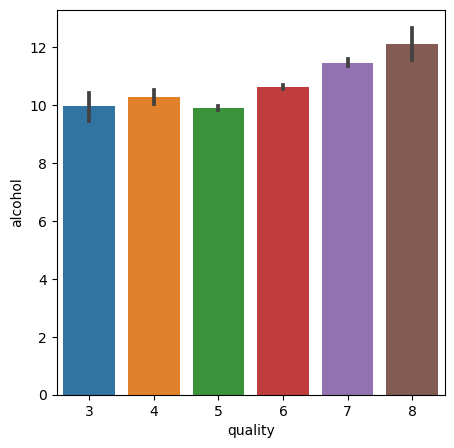

In [43]:
# comparing two columns (alcohol, quality)
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality',y = 'alcohol', data = wine_dataset)
plt.show()


In [44]:
#finding the correlation of the columns to the quality column
correlation=wine_dataset.corr()

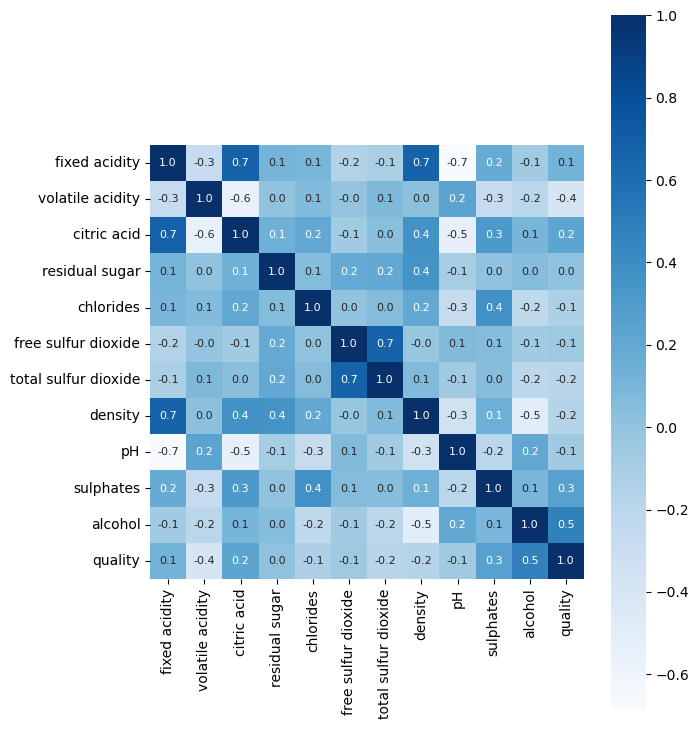

In [53]:
# heatmap helps us to understand which columns are corelated positively and negatively 
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(7,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

# Data pre processing

In [55]:
# separating the data and the target
x=wine_dataset.drop('quality',axis=1)# when we are dropping the column we need to mention the axis=1 for the columns

In [56]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

label binarization

In [57]:
# instead of having the 6 to 7 quality values i want to have them only as 2 like yes or no (or) true or false
y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

Spliting the data into the train and test

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [61]:
print(y.shape,y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


In [63]:
#Random forest classifier
model=RandomForestClassifier()

In [64]:
model.fit(x_train,y_train)#fit is used to traning the model

RandomForestClassifier()

In [65]:
#evaluating the model
# we are using accuarcy score to evaluate our model
#accuracy on test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [66]:
print('accuracy:',test_data_accuracy)

accuracy: 0.928125


Building a predictive system

In [73]:
import warnings
warnings.filterwarnings('ignore')
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# giving an input to the numpy array
n_array=np.asarray(input_data)#asarray is used to  covert the particuar data into the numpy array
# reshaping the data as we prediction the label for the one instance 
reshaped=n_array.reshape(1,-1)
prediction=model.predict(reshaped)
print(prediction)
if  (prediction[0]==1):
    print(" Good quality wine")
else:
    print(' Bad quality wine')

[1]
 Good quality wine


In [74]:
# for example lets check with the other input data to see whether the output is correfct or wrong

import warnings
warnings.filterwarnings('ignore')
new_input=(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)
num_array=np.asarray(new_input)
reshaped_array=num_array.reshape(1,-1)
predicting=model.predict(reshaped_array)
print(predicting)
if  (predicting[0]==1):
    print(" Good quality wine")
else:
    print(' Bad quality wine')

[0]
 Bad quality wine
